Steps to implement Dirichlet Classifcation from scratch
========

1. Implement computeLogLikelihood:  
 - use scipy.special.poch to compute logLikelihood  
 - practicals for performance: use numpy sum instead of generic sum (10x performance difference for lexicon size vector)  
2. Implement ML estimation using fixed point iteration, as pointed out in Minka (2003)  


/app/dirichletClassification.py:89: RuntimeWarning: invalid value encountered in float_scalars
  return logFirstFraction + logSecondFractionArray.sum()


Elapsed Time for predicting dirichelt:  151.74358701705933


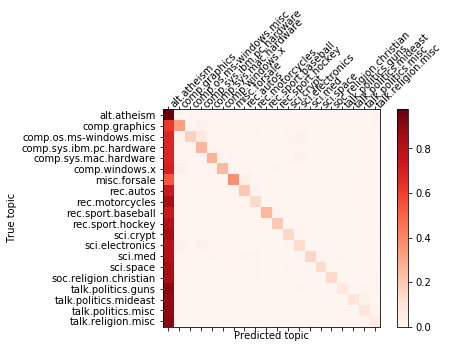

StatisticsError: variance requires at least two data points

In [54]:
%run dirichletClassification.py #for comparison between multi, and dirichlet

In [52]:
%run dirichletClassification.py

Topic average time is:  0.017971360683441163
Topic average time is:  0.018205034732818603
Topic average time is:  0.018135440349578858
Topic average time is:  0.018008887767791748
Topic average time is:  0.01958094835281372
Topic average time is:  0.01949901580810547
Topic average time is:  0.02004246711730957


KeyboardInterrupt: 

In [51]:
from scipy.special import gammaln
numP=10000
l = np.array( range( numP ))
l2 = np.array( range( 1, numP+1))
gammaNum = gammaln( l )
gammaNum = gammaln( l )
%timeit sum( gammaln(l + l2) - gammaln(l))
%timeit (gammaln(l+l2) - gammaln(l)).sum()
%timeit gammaln(l+l2) - gammaln(l)
%timeit sum(log(poch(l, l2)))
%timeit l + l2
%timeit np.add( l, l2 )

1.29 ms ± 15.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
595 µs ± 48.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
570 µs ± 36.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


4.96 ms ± 384 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.28 µs ± 148 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.48 µs ± 315 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


ML Estimation for DCM with Fixed Point Algorithm
======
Step One: update with variable number of documents per parameter update  


Took on average  0.010001182556152344  per iteration in updating parameter 
Took on average  0.010139703750610352  per iteration in updating parameter 
Took on average  0.009975433349609375  per iteration in updating parameter 
Took on average  0.00981593132019043  per iteration in updating parameter 
Took on average  0.009985923767089844  per iteration in updating parameter 
Took on average  0.01001429557800293  per iteration in updating parameter 
Took on average  0.009932756423950195  per iteration in updating parameter 
Took on average  0.010515928268432617  per iteration in updating parameter 
Took on average  0.012171745300292969  per iteration in updating parameter 
Took on average  0.011327266693115234  per iteration in updating parameter 
Took on average  0.010673046112060547  per iteration in updating parameter 
Took on average  0.011989831924438477  per iteration in updating parameter 
Took on average  0.010785102844238281  per iteration in updating parameter 
Took on averag

/app/dirichletClassification.py:178: RuntimeWarning: invalid value encountered in double_scalars
  return logFirstFraction + logSecondFractionArray.sum()


Elapsed Time for predicting dirichlet:  186.20295906066895


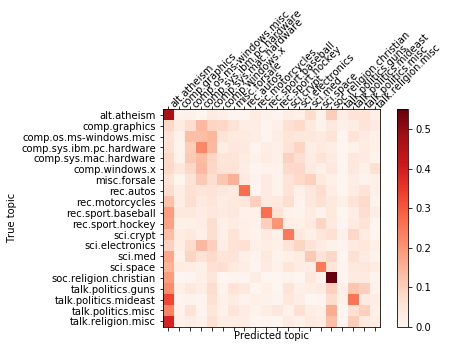

StatisticsError: variance requires at least two data points

In [6]:
%run dirichletClassification.py

Experiments with numDocsPerIteration = 1
------
It is interesting to see how long it takes to compute the update equation:  
- with numDocsPerIteration = 1, maxIter = num Documents in each topic used for weight updating  
e.g.) if maxIter = 2, then only 2 documents from training set was used for updating the final weights (unless fixed point algorithm converged from the first document)  

- on average, calculating the digammas take: 0.01 seconds / document  

Putting that into perspective:  
- SGD would take 0.01 seconds * numIterations * 1 * numTopics for learning the parameters  
- GD (with whole topics) would take 0.01 seconds * numIter * numDocsPerUpdate * numTopics  
Each topic has a variable number of documents per topic.  
For the 20_newsgroup with 20K document, let's say avg numDocsPerUpdate for GD = 1K -> traingin parmaeters with GD would take 0.01 s * 1000 * 1K * 20 = 200K seconds (55 hours)  

General Equation for calculating time for ML estimation for a topic
---------
Let number of documents per iteration = docPerIter  
Then in the worst case, it would take: maxIter * docPerIter * 0.01s  
Number of documents used for training per topic: maxIter * docPerIter (same document used multiple times across updates are counted as distinct documents for each update)  

For the GD: maxIter = 1000, docPerIterAvg = 1000, -> GD per topic: 10k sec (2.7 hours), 1M documents per topic  
With SGD: maxIter = 1000, docPerIter = single digit -> SGD per topic: 100 sec (2 mins), 10K documents per topic  

/app/dirichletModel.py:95: RuntimeWarning: invalid value encountered in double_scalars
  return logFirstFraction + logSecondFractionArray.sum()



Avg time to train model per topic:  0.19014241695404052 +-  0.0794068036535159
Avg time per iteration is:  0.06036267204890176
Avg time per document is:  0.03018133602445088
Total time taken to update topics is 3.8028483390808105
Avg number of iterations per topic:  3.15 +-  0.36634754853252327
Max NumIter was:  50
Avg Num documents used for training per topic:  6.3 +-  0.7326950970650465
Elapsed Time for predicting dirichlet:  304.89489793777466

Avg time to train model per topic:  0.07299753427505493 +-  0.012619146552071985
Avg time per iteration is:  0.02433251142501831
Avg time per document is:  0.012166255712509155
Total time taken to update topics is 1.4599506855010986
Avg number of iterations per topic:  3 +-  0.0
Max NumIter was:  50
Avg Num documents used for training per topic:  6 +-  0.0
Elapsed Time for predicting dirichlet:  167.33782505989075

Avg time to train model per topic:  0.0691190481185913 +-  0.007931472116715665
Avg time per iteration is:  0.022661982989702067

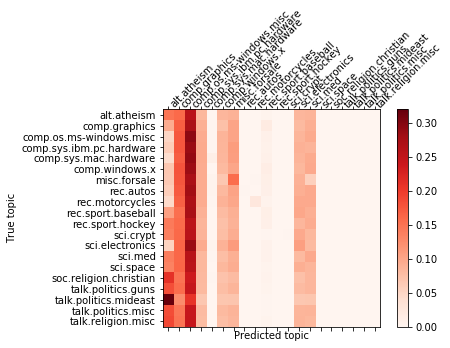

Precision:  0.06047499999999999  +/-  0.006740682870121958


In [31]:
%run dirichletClassification.py 50 2 10 9 #maxIter, numDocsPerIteration, numSplits, powerThreshold

/app/dirichletModel.py:105: RuntimeWarning: invalid value encountered in double_scalars
  return logFirstFraction + logSecondFractionArray.sum()



Avg time to train model per topic:  24.10286326408386 +-  1.6865411984150886
Avg time per iteration is:  0.02410286326408386
Avg time per document is:  0.00803428775469462
Total time taken to update topics is 482.05726528167725
Avg number of iterations per topic:  1000 +-  0.0
Max NumIter was:  1000
Avg Num documents used for training per topic:  3000 +-  0.0
Elapsed Time for predicting dirichlet:  187.86333918571472

Avg time to train model per topic:  27.181532967090607 +-  3.958860162535329
Avg time per iteration is:  0.027181532967090607
Avg time per document is:  0.009060510989030202
Total time taken to update topics is 543.6306593418121
Avg number of iterations per topic:  1000 +-  0.0
Max NumIter was:  1000
Avg Num documents used for training per topic:  3000 +-  0.0
Elapsed Time for predicting dirichlet:  171.08182740211487


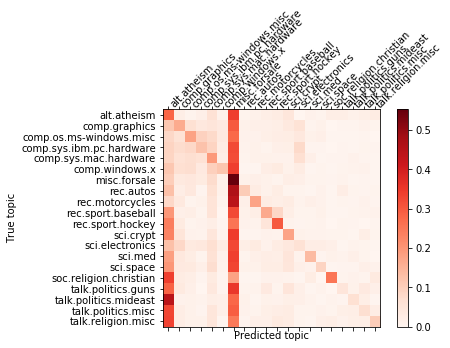

Precision:  0.16925  +/-  0.048083261120685235


In [2]:
%run dirichletClassification.py 1000 3 2 6

/app/dirichletModel.py:105: RuntimeWarning: invalid value encountered in double_scalars
  return logFirstFraction + logSecondFractionArray.sum()



Avg time to train model per topic:  36.170831406116484 +-  0.7672249913624974
Avg time per iteration is:  0.03617083140611648
Avg time per document is:  0.007234166281223297
Total time taken to update topics is 723.4166281223297
Avg number of iterations per topic:  1000 +-  0.0
Max NumIter was:  1000
Avg Num documents used for training per topic:  5000 +-  0.0
Elapsed Time for predicting dirichlet:  187.16209411621094

Avg time to train model per topic:  36.56621333360672 +-  0.8519581073188484
Avg time per iteration is:  0.03656621333360672
Avg time per document is:  0.007313242666721344
Total time taken to update topics is 731.3242666721344
Avg number of iterations per topic:  1000 +-  0.0
Max NumIter was:  1000
Avg Num documents used for training per topic:  5000 +-  0.0
Elapsed Time for predicting dirichlet:  168.90383315086365


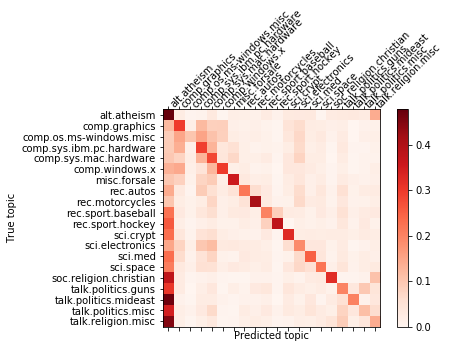

Precision:  0.26424999999999993  +/-  0.0045961940777125235


In [3]:
%run dirichletClassification.py 1000 5 2 6

/app/dirichletModel.py:105: RuntimeWarning: invalid value encountered in double_scalars
  return logFirstFraction + logSecondFractionArray.sum()



Avg time to train model per topic:  19.50012891292572 +-  2.0732014427739913
Avg time per iteration is:  0.01950012891292572
Avg time per document is:  0.0039000257825851444
Total time taken to update topics is 390.0025782585144
Avg number of iterations per topic:  1000 +-  0.0
Max NumIter was:  1000
Avg Num documents used for training per topic:  5000 +-  0.0
Elapsed Time for predicting dirichlet:  201.25967860221863

Avg time to train model per topic:  35.23723926544189 +-  7.910207046123517
Avg time per iteration is:  0.035237239265441894
Avg time per document is:  0.007047447853088379
Total time taken to update topics is 704.7447853088379
Avg number of iterations per topic:  1000 +-  0.0
Max NumIter was:  1000
Avg Num documents used for training per topic:  5000 +-  0.0
Elapsed Time for predicting dirichlet:  171.90034770965576


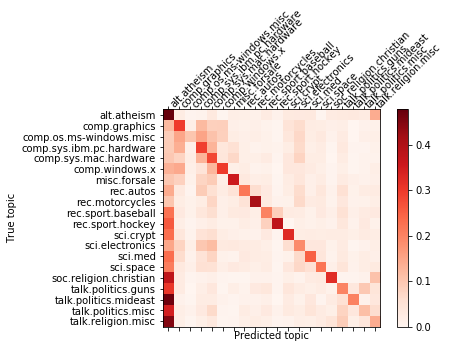

Precision:  0.26424999999999993  +/-  0.0045961940777125235


In [21]:
%reload_ext autoreload
%autoreload 2
%run dirichletClassification.py 1000 5 2 6

Effects of threshold
=====
Because we are constrained time for training, we're exploring to fix number of documents considered per topic training.  
Parameters that can control total # of documents: maxIter, tolerance.  
For 5 documents per iteration: maxIter = 10 roughly equal to toleration.  

/app/dirichletModel.py:105: RuntimeWarning: invalid value encountered in double_scalars
  return logFirstFraction + logSecondFractionArray.sum()



Avg time to train model per topic:  0.20151784420013427 +-  0.036434900062885835
Avg time per iteration is:  0.019192175638108027
Avg time per document is:  0.003838435127621605
Total time taken to update topics is 4.0303568840026855
Avg number of iterations per topic:  10.5 +-  2.1398475105532757
Max NumIter was:  1000
Avg Num documents used for training per topic:  52.5 +-  10.69923755276638
Elapsed Time for predicting dirichlet:  169.09426522254944

Avg time to train model per topic:  0.2735757350921631 +-  0.0658423110580044
Avg time per iteration is:  0.024426404918943136
Avg time per document is:  0.004885280983788627
Total time taken to update topics is 5.471514701843262
Avg number of iterations per topic:  11.2 +-  3.1051739505473592
Max NumIter was:  1000
Avg Num documents used for training per topic:  56 +-  15.525869752736797
Elapsed Time for predicting dirichlet:  168.13275933265686


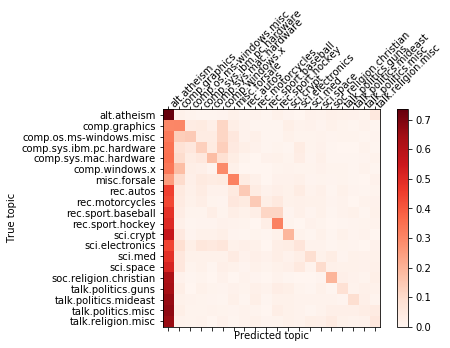

Precision:  0.18712499999999993  +/-  0.00017677669529663701


In [7]:
%reload_ext autoreload
%autoreload 2
%run dirichletClassification.py 1000 5 2 -3

/app/dirichletModel.py:105: RuntimeWarning: invalid value encountered in double_scalars
  return logFirstFraction + logSecondFractionArray.sum()



Avg time to train model per topic:  2.042122781276703 +-  0.8456186728423187
Avg time per iteration is:  0.27596253801036524
Avg time per document is:  0.005519250760207305
Total time taken to update topics is 40.84245562553406
Avg number of iterations per topic:  7.4 +-  3.267060484675225
Max NumIter was:  1000
Avg Num documents used for training per topic:  370 +-  163.35302423376126
Elapsed Time for predicting dirichlet:  167.39125990867615

Avg time to train model per topic:  2.101691520214081 +-  1.0684358336911208
Avg time per iteration is:  0.3002416457448687
Avg time per document is:  0.006004832914897374
Total time taken to update topics is 42.033830404281616
Avg number of iterations per topic:  7 +-  3.9068091705043444
Max NumIter was:  1000
Avg Num documents used for training per topic:  350 +-  195.3404585252172
Elapsed Time for predicting dirichlet:  199.6644995212555


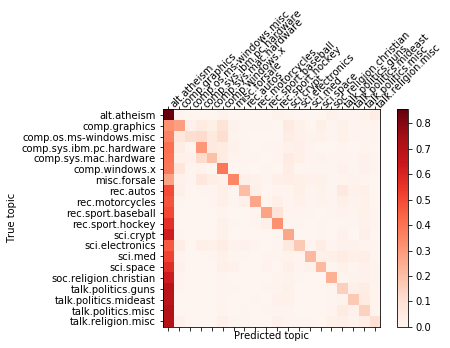

Precision:  0.263125  +/-  0.010076271631908293


In [8]:
%reload_ext autoreload
%autoreload 2
%run dirichletClassification.py 1000 50 2 -3

/app/dirichletModel.py:105: RuntimeWarning: invalid value encountered in double_scalars
  return logFirstFraction + logSecondFractionArray.sum()



Avg time to train model per topic:  6.314287221431732 +-  1.0715068701902426
Avg time per iteration is:  0.31890339502180465
Avg time per document is:  0.006378067900436093
Total time taken to update topics is 126.28574442863464
Avg number of iterations per topic:  19.8 +-  0.6155870112510925
Max NumIter was:  20
Avg Num documents used for training per topic:  990 +-  30.779350562554622
Elapsed Time for predicting dirichlet:  257.5486764907837

Avg time to train model per topic:  6.014077663421631 +-  0.36067334198978457
Avg time per iteration is:  0.3045102614390699
Avg time per document is:  0.006090205228781398
Total time taken to update topics is 120.28155326843262
Avg number of iterations per topic:  19.75 +-  0.7863975156570492
Max NumIter was:  20
Avg Num documents used for training per topic:  987.5 +-  39.319875782852456
Elapsed Time for predicting dirichlet:  249.4484417438507


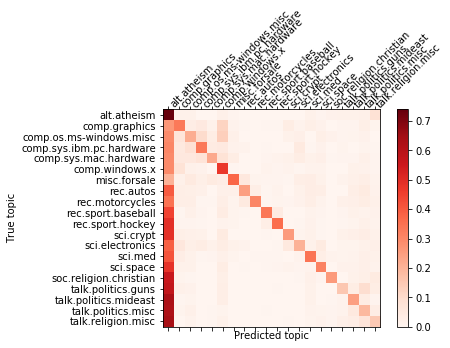

Precision:  0.3035  +/-  0.001767766952966331


In [12]:
%reload_ext autoreload
%autoreload 2
%run dirichletClassification.py 20 50 2 -2

/app/dirichletModel.py:105: RuntimeWarning: invalid value encountered in double_scalars
  return logFirstFraction + logSecondFractionArray.sum()



Avg time to train model per topic:  11.187777042388916 +-  2.1931619332761922
Avg time per iteration is:  0.25837822268796573
Avg time per document is:  0.005167564453759314
Total time taken to update topics is 223.75554084777832
Avg number of iterations per topic:  43.3 +-  8.6699723790005
Max NumIter was:  100
Avg Num documents used for training per topic:  2165 +-  433.498618950025
Elapsed Time for predicting dirichlet:  169.8196680545807

Avg time to train model per topic:  11.898042130470277 +-  2.4722521753935585
Avg time per iteration is:  0.27257828477595136
Avg time per document is:  0.005451565695519027
Total time taken to update topics is 237.96084260940552
Avg number of iterations per topic:  43.65 +-  8.992833403971128
Max NumIter was:  100
Avg Num documents used for training per topic:  2182.5 +-  449.64167019855637
Elapsed Time for predicting dirichlet:  217.20801854133606


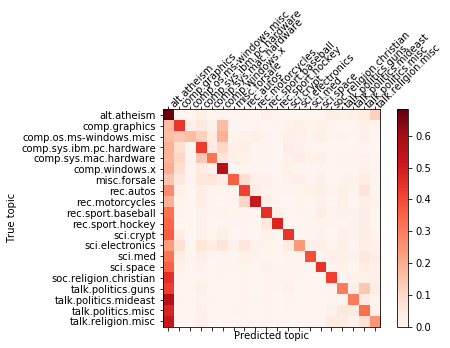

Precision:  0.396625  +/-  0.007954951288348687


In [13]:
%reload_ext autoreload
%autoreload 2
%run dirichletClassification.py 100 50 2 -1

/app/dirichletModel.py:105: RuntimeWarning: invalid value encountered in double_scalars
  return logFirstFraction + logSecondFractionArray.sum()



Avg time to train model per topic:  33.60866503715515 +-  22.703350138731977
Avg time per iteration is:  0.34809596102698237
Avg time per document is:  0.006961919220539648
Total time taken to update topics is 672.173300743103
Avg number of iterations per topic:  96.55 +-  67.82289242462389
Max NumIter was:  250
Avg Num documents used for training per topic:  4827.5 +-  3391.144621231195
Elapsed Time for predicting dirichlet:  263.7403814792633

Avg time to train model per topic:  32.433088827133176 +-  24.426825528556748
Avg time per iteration is:  0.37236611741829134
Avg time per document is:  0.007447322348365827
Total time taken to update topics is 648.6617765426636
Avg number of iterations per topic:  87.1 +-  57.07142339578585
Max NumIter was:  250
Avg Num documents used for training per topic:  4355 +-  2853.5711697892925
Elapsed Time for predicting dirichlet:  201.15382409095764


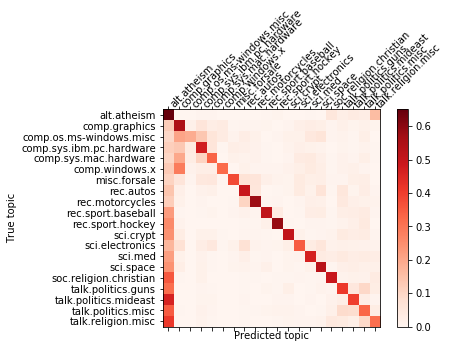

Precision:  0.4435000000000001  +/-  0.015202795795510786


In [14]:
%reload_ext autoreload
%autoreload 2
%run dirichletClassification.py 250 50 2 0

/app/dirichletModel.py:105: RuntimeWarning: invalid value encountered in double_scalars
  return logFirstFraction + logSecondFractionArray.sum()



Avg time to train model per topic:  13.28268837928772 +-  1.7245800025498372
Avg time per iteration is:  0.55460076740241
Avg time per document is:  0.0055460076740241
Total time taken to update topics is 265.6537675857544
Avg number of iterations per topic:  23.95 +-  2.8372521918222215
Max NumIter was:  25
Avg Num documents used for training per topic:  2395 +-  283.72521918222213
Elapsed Time for predicting dirichlet:  212.16542863845825

Avg time to train model per topic:  12.609021425247192 +-  0.6941041743407314
Avg time per iteration is:  0.5157063977606213
Avg time per document is:  0.005157063977606214
Total time taken to update topics is 252.18042850494385
Avg number of iterations per topic:  24.45 +-  1.190974832912761
Max NumIter was:  25
Avg Num documents used for training per topic:  2445 +-  119.0974832912761
Elapsed Time for predicting dirichlet:  212.39870166778564


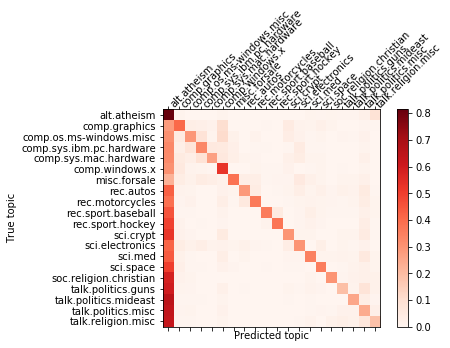

Precision:  0.345375  +/-  0.013258252147247797


In [15]:
%reload_ext autoreload
%autoreload 2
%run dirichletClassification.py 25 100 2 -2

/app/dirichletModel.py:105: RuntimeWarning: invalid value encountered in double_scalars
  return logFirstFraction + logSecondFractionArray.sum()



Avg time to train model per topic:  121.38194155693054 +-  325.1413333129324
Avg time per iteration is:  2.396484532219754
Avg time per document is:  0.02396484532219754
Total time taken to update topics is 2427.638831138611
Avg number of iterations per topic:  50.65 +-  12.308640525214283
Max NumIter was:  100
Avg Num documents used for training per topic:  5065 +-  1230.8640525214284
Elapsed Time for predicting dirichlet:  166.9015338420868

Avg time to train model per topic:  23.540863633155823 +-  4.795007924337096
Avg time per iteration is:  0.45933392454938193
Avg time per document is:  0.004593339245493819
Total time taken to update topics is 470.81727266311646
Avg number of iterations per topic:  51.25 +-  10.847628894444119
Max NumIter was:  100
Avg Num documents used for training per topic:  5125 +-  1084.762889444412
Elapsed Time for predicting dirichlet:  164.99662494659424


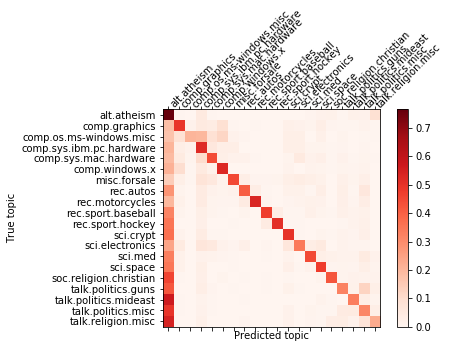

Precision:  0.436125  +/-  0.00017677669529657817


In [16]:
%reload_ext autoreload
%autoreload 2
%run dirichletClassification.py 100 100 2 -1

/app/dirichletModel.py:105: RuntimeWarning: invalid value encountered in double_scalars
  return logFirstFraction + logSecondFractionArray.sum()



Avg time to train model per topic:  37.15695772171021 +-  18.998367483855574
Avg time per iteration is:  0.4575980014988942
Avg time per document is:  0.004575980014988942
Total time taken to update topics is 743.1391544342041
Avg number of iterations per topic:  81.2 +-  42.07962377258268
Max NumIter was:  250
Avg Num documents used for training per topic:  8120 +-  4207.962377258268
Elapsed Time for predicting dirichlet:  169.6925241947174

Avg time to train model per topic:  1573.5798115491866 +-  6865.363578707791
Avg time per iteration is:  17.37802111042724
Avg time per document is:  0.17378021110427241
Total time taken to update topics is 31471.596230983734
Avg number of iterations per topic:  90.55 +-  55.6969950998965
Max NumIter was:  250
Avg Num documents used for training per topic:  9055 +-  5569.69950998965
Elapsed Time for predicting dirichlet:  166.79033279418945


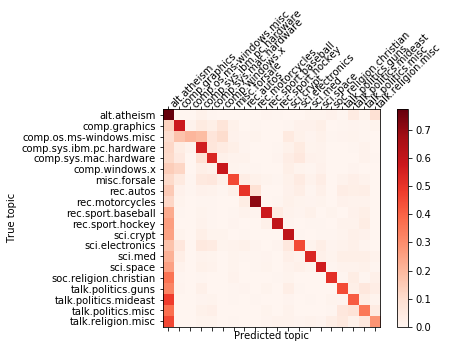

Precision:  0.51325  +/-  0.01131370849898477


In [17]:
%reload_ext autoreload
%autoreload 2
%run dirichletClassification.py 250 100 2 0

/app/dirichletModel.py:105: RuntimeWarning: invalid value encountered in double_scalars
  return logFirstFraction + logSecondFractionArray.sum()



Avg time to train model per topic:  138.82273390293122 +-  33.51509724379769
Avg time per iteration is:  0.5552909356117248
Avg time per document is:  0.0055529093561172485
Total time taken to update topics is 2776.4546780586243
Avg number of iterations per topic:  250 +-  0.0
Max NumIter was:  250
Avg Num documents used for training per topic:  25000 +-  0.0
Elapsed Time for predicting dirichlet:  295.7691442966461

Avg time to train model per topic:  117.53132244348527 +-  16.916438611079705
Avg time per iteration is:  0.4701252897739411
Avg time per document is:  0.004701252897739411
Total time taken to update topics is 2350.626448869705
Avg number of iterations per topic:  250 +-  0.0
Max NumIter was:  250
Avg Num documents used for training per topic:  25000 +-  0.0
Elapsed Time for predicting dirichlet:  162.01103472709656


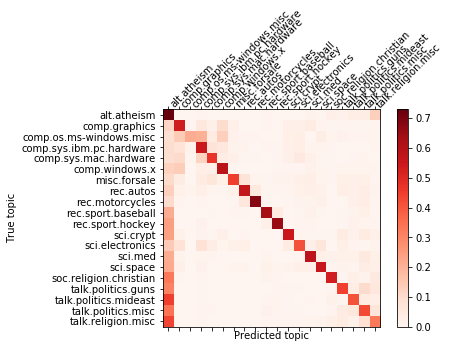

Precision:  0.516  +/-  0.013435028842544414


In [18]:
%reload_ext autoreload
%autoreload 2
%run dirichletClassification.py 250 100 2 1

/app/dirichletModel.py:105: RuntimeWarning: invalid value encountered in double_scalars
  return logFirstFraction + logSecondFractionArray.sum()



Avg time to train model per topic:  58.543627083301544 +-  16.231324087538873
Avg time per iteration is:  0.7568665427705437
Avg time per document is:  0.005045776951803624
Total time taken to update topics is 1170.8725416660309
Avg number of iterations per topic:  77.35 +-  15.02725593888091
Max NumIter was:  100
Avg Num documents used for training per topic:  11602.5 +-  2254.0883908321366
Elapsed Time for predicting dirichlet:  168.6512176990509

Avg time to train model per topic:  234.54920637607574 +-  793.077577389597
Avg time per iteration is:  3.0580079058158507
Avg time per document is:  0.02038671937210567
Total time taken to update topics is 4690.984127521515
Avg number of iterations per topic:  76.7 +-  14.682965425424475
Max NumIter was:  100
Avg Num documents used for training per topic:  11505 +-  2202.4448138136713
Elapsed Time for predicting dirichlet:  222.240873336792


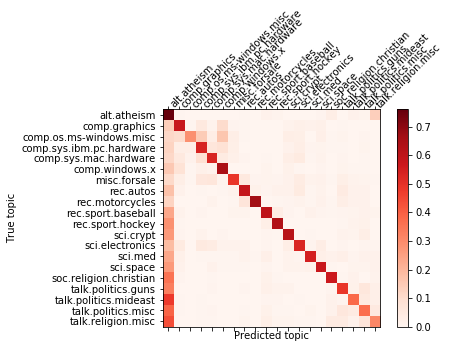

Precision:  0.53575  +/-  0.00777817459305203


In [19]:
%reload_ext autoreload
%autoreload 2
%run dirichletClassification.py 100 150 2 0

/app/dirichletModel.py:105: RuntimeWarning: invalid value encountered in double_scalars
  return logFirstFraction + logSecondFractionArray.sum()



Avg time to train model per topic:  97.33495525121688 +-  17.478694157485066
Avg time per iteration is:  1.2083793327277081
Avg time per document is:  0.0060418966636385405
Total time taken to update topics is 1946.6991050243378
Avg number of iterations per topic:  80.55 +-  15.146564661751905
Max NumIter was:  100
Avg Num documents used for training per topic:  16110 +-  3029.312932350381
Elapsed Time for predicting dirichlet:  256.4870412349701

Avg time to train model per topic:  82.68672126531601 +-  28.00202875776208
Avg time per iteration is:  1.0316496726801747
Avg time per document is:  0.005158248363400874
Total time taken to update topics is 1653.7344253063202
Avg number of iterations per topic:  80.15 +-  14.401297456168754
Max NumIter was:  100
Avg Num documents used for training per topic:  16030 +-  2880.259491233751
Elapsed Time for predicting dirichlet:  162.34270596504211


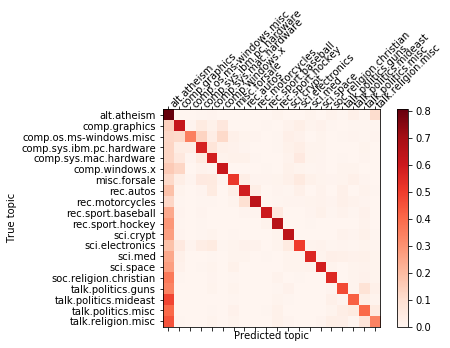

Precision:  0.55  +/-  0.008131727983645186


In [20]:
%reload_ext autoreload
%autoreload 2
%run dirichletClassification.py 100 200 2 0

/app/dirichletModel.py:105: RuntimeWarning: invalid value encountered in double_scalars
  return logFirstFraction + logSecondFractionArray.sum()



Avg time to train model per topic:  156.93665487766265 +-  4.374273339419859
Avg time per iteration is:  1.0462443658510843
Avg time per document is:  0.005231221829255422
Total time taken to update topics is 3138.733097553253
Avg number of iterations per topic:  150 +-  0.0
Max NumIter was:  150
Avg Num documents used for training per topic:  30000 +-  0.0
Elapsed Time for predicting dirichlet:  174.52067160606384

Avg time to train model per topic:  135.05935695171357 +-  1.6606857712995353
Avg time per iteration is:  0.9003957130114237
Avg time per document is:  0.0045019785650571185
Total time taken to update topics is 2701.1871390342712
Avg number of iterations per topic:  150 +-  0.0
Max NumIter was:  150
Avg Num documents used for training per topic:  30000 +-  0.0
Elapsed Time for predicting dirichlet:  162.29293656349182


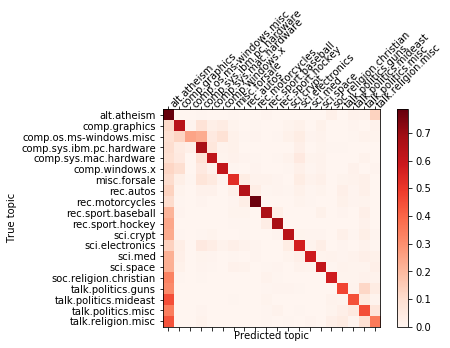

Precision:  0.57775  +/-  0.005303300858899072


In [21]:
%reload_ext autoreload
%autoreload 2
%run dirichletClassification.py 150 200 2 1

In [1]:
%reload_ext autoreload
%autoreload 2
%run dirichletClassification.py 100 250 2 0

/app/dirichletModel.py:105: RuntimeWarning: invalid value encountered in double_scalars
  return logFirstFraction + logSecondFractionArray.sum()



Avg time to train model per topic:  170.0752641439438 +-  28.645383488885766
Avg time per iteration is:  2.0577769406405784
Avg time per document is:  0.008231107762562313
Total time taken to update topics is 3401.5052828788757
Avg number of iterations per topic:  82.65 +-  14.328018190355493
Max NumIter was:  100
Avg Num documents used for training per topic:  20662.5 +-  3582.0045475888733
Elapsed Time for predicting dirichlet:  164.22634720802307

Avg time to train model per topic:  166.01648898124694 +-  29.580343469207893
Avg time per iteration is:  2.0320255689259112
Avg time per document is:  0.008128102275703644
Total time taken to update topics is 3320.329779624939
Avg number of iterations per topic:  81.7 +-  14.959946523968593
Max NumIter was:  100
Avg Num documents used for training per topic:  20425 +-  3739.9866309921485
Elapsed Time for predicting dirichlet:  165.1262547969818


<Figure size 640x480 with 2 Axes>

Precision:  0.5503750000000001  +/-  0.0030052038200427318


In [1]:
%reload_ext autoreload
%autoreload 2
%run dirichletClassification.py 150 250 2 1

/app/dirichletModel.py:105: RuntimeWarning: invalid value encountered in double_scalars
  return logFirstFraction + logSecondFractionArray.sum()



Avg time to train model per topic:  305.1326048016548 +-  2.2690930583421793
Avg time per iteration is:  2.0342173653443654
Avg time per document is:  0.008136869461377462
Total time taken to update topics is 6102.652096033096
Avg number of iterations per topic:  150 +-  0.0
Max NumIter was:  150
Avg Num documents used for training per topic:  37500 +-  0.0
Elapsed Time for predicting dirichlet:  162.82151627540588

Avg time to train model per topic:  306.5568597197533 +-  3.2474353281819157
Avg time per iteration is:  2.0437123981316887
Avg time per document is:  0.008174849592526755
Total time taken to update topics is 6131.137194395065
Avg number of iterations per topic:  150 +-  0.0
Max NumIter was:  150
Avg Num documents used for training per topic:  37500 +-  0.0
Elapsed Time for predicting dirichlet:  164.64679598808289


<Figure size 640x480 with 2 Axes>

Precision:  0.597125  +/-  0.007601397897755412


In [ ]:
%reload_ext autoreload
%autoreload 2
%run dirichletClassification.py 250 250 2 1

Industry Sector dataset classification
===========
Realized that 20_newsgroup we are using the original, whereas the paper uses modified version.  
Refactored dataset and splitData.py such that the way you run the script has changed  